EJERCICIO 1.
Usando la librería seaborn, crea una gráfica de barras que muestre el número de personas que han hecho cada actividad en cada año. Hacedlo solo desde el 2015. Os podrá salir una gráfica un poco fea, no os preocupeis, es lo que esperamos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("attacks2.csv")
df.head(3)

,Unnamed: 0,case-number,year,type,country,area,location,activity,name,sex-,age,time,species-,href,case-number.2,siglo
0,0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,siglo_XXI
1,6,2018.06.03.a,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,Late afternoon,Tiger shark,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,siglo_XXI
2,8,2018.05.26.b,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,17h00,"Bull shark, 6'",http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,siglo_XXI


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1502 non-null   int64  
 1   case-number    1502 non-null   object 
 2   year           1502 non-null   float64
 3   type           1502 non-null   object 
 4   country        1502 non-null   object 
 5   area           1502 non-null   object 
 6   location       1502 non-null   object 
 7   activity       1502 non-null   object 
 8   name           1502 non-null   object 
 9   sex-           1502 non-null   object 
 10  age            1502 non-null   object 
 11  time           1502 non-null   object 
 12  species-       1502 non-null   object 
 13  href           1502 non-null   object 
 14  case-number.2  1502 non-null   object 
 15  siglo          1502 non-null   object 
dtypes: float64(1), int64(1), object(14)
memory usage: 187.9+ KB


In [4]:
df_2015 = df[df["year"]>2015]
df_2015.head(2)

,Unnamed: 0,case-number,year,type,country,area,location,activity,name,sex-,age,time,species-,href,case-number.2,siglo
0,0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,siglo_XXI
1,6,2018.06.03.a,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,Late afternoon,Tiger shark,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,siglo_XXI


In [5]:
actividad_agrupado = df_2015.groupby(["activity","year"])
actividad_agrupado.size()

activity                 year  
Body boarding            2017.0     1
Diving                   2016.0     1
Feeding sharks           2018.0     1
Fishing                  2016.0     5
                         2017.0     1
                         2018.0     2
Floating                 2016.0     2
Floating in tube         2016.0     1
Kayaking                 2017.0     1
Kayaking / Fishing       2017.0     1
Kite surfing             2016.0     1
Night bathing            2017.0     1
Paddle boarding          2016.0     1
Paddle-skiing            2018.0     1
Paddling                 2018.0     1
SUP                      2017.0     2
SUP Foil boarding        2016.0     1
Scuba Diving             2017.0     1
Scuba diving             2018.0     1
Snorkeling               2017.0     2
Spearfishing             2016.0     3
                         2017.0     1
Stand-Up Paddleboarding  2018.0     1
Standing                 2016.0     1
Surf fishing             2016.0     1
Surf skiing       

In [8]:
df_f = df_2015.groupby(["activity","year"]).size().reset_index()
df_f.head()

,activity,year,0
0,Body boarding,2017.0,1
1,Diving,2016.0,1
2,Feeding sharks,2018.0,1
3,Fishing,2016.0,5
4,Fishing,2017.0,1


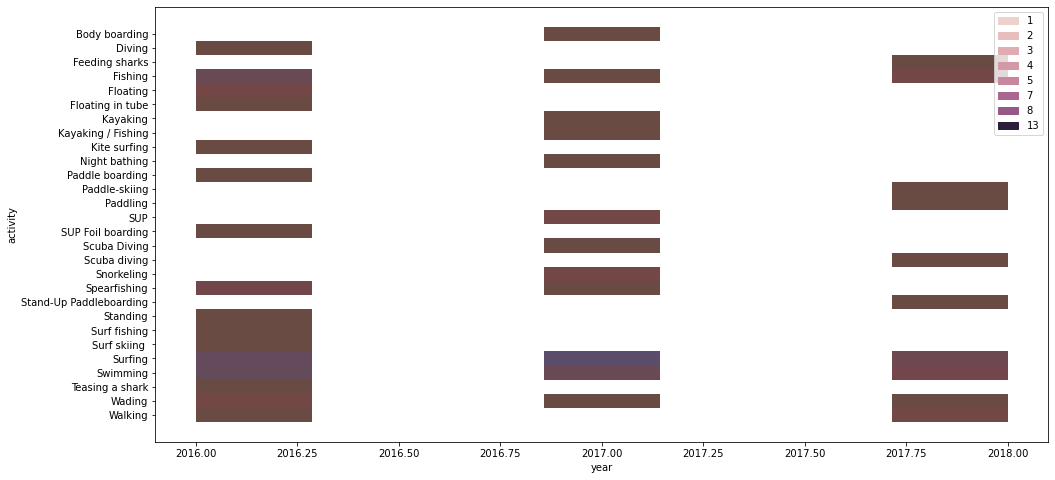

In [12]:
plt.figure(figsize = (16,8))

fig = sns.histplot(x = "year", y = 'activity',data = df_f, hue = 0)

plt.show()


EJERCICIO 2.
Usando la librería seaborn, crea una gráfica de barras que muestre el número de ataques que han ocurrido cada año en función del sexo. Hacedlo solo desde el 2015. 